# Data Analysis Jupyter Notebook

This Jupyter Notebook is a template for data analysis. It includes installation of necessary libraries, loading datasets, and displaying basic information and statistics for each dataset.


## Install Required Packages

First of all, we will install all the required packages:


In [39]:
#%%capture
!python -m pip install --upgrade pip
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install geopandas

     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/51.1 kB ? eta -:--:--
     --------------- ---------------------- 20.5/51.1 kB 330.3 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.1 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 327.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -------- ------------------------------- 0.2/1.1 MB 14.7 MB/s eta 0:00:01
   ------------ --------------------------- 0.3/1.1 MB 20.5 MB/s eta 0:00:01
   ------------ --------------------------- 0.3/1.1 MB 20.5 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.1 MB 3.6 MB/s eta 0:00:01
   ---------------------------- ----------- 0.8/1.1 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 4.7 MB/s eta 0:00:00
   --------

## Data Understanding

We will read the datasets in order to understand the information that they contain.

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the three datasets
dataset1 = pd.read_csv('./project_datasets/incidents.csv', low_memory=False)
dataset2 = pd.read_csv('./project_datasets/povertyByStateYear.csv')
dataset3 = pd.read_csv('./project_datasets/year_state_district_house.csv')

In [ ]:
# Display basic information about each dataset
print("\n------- Dataset 1 Info:-------")
print(dataset1.info())

print("\n------- Dataset 2 Info:-------")
print(dataset2.info())

print("\n------- Dataset 3 Info:-------")
print(dataset3.info())

In [20]:
# Display the first few rows of each dataset
print("------- Dataset 1 - Incidents: -------")
print(dataset1.head())

print("\n------- Dataset 2 - Poverty By State and Year: -------")
print(dataset2.head())

print("\n------- Dataset 3 - Year State District House:-------")
print(dataset3.head())

------- Dataset 1 - Incidents: -------
         date                 state city_or_county  \
0  2015-05-02               Indiana   Indianapolis   
1  2017-04-03          Pennsylvania           Kane   
2  2016-11-05              Michigan        Detroit   
3  2016-10-15  District of Columbia     Washington   
4  2030-06-14          Pennsylvania     Pittsburgh   

                              address  latitude  longitude  \
0       Lafayette Road and Pike Plaza   39.8322   -86.2492   
1                           5647 US 6   41.6645   -78.7856   
2   6200 Block of East McNichols Road   42.4190   -83.0393   
3  1000 block of Bladensburg Road, NE   38.9030   -76.9820   
4     California and Marshall Avenues   40.4621   -80.0308   

   congressional_district  state_house_district  state_senate_district  \
0                     7.0                  94.0                   33.0   
1                     5.0                   NaN                    NaN   
2                    14.0                

In [ ]:
# Display basic statistics for each dataset
print("\n------- Dataset 1 Statistics:-------")
print(dataset1.describe())

print("\n------- Dataset 2 Statistics:-------")
print(dataset2.describe())

print("\n------- Dataset 3 Statistics:-------")
print(dataset3.describe())


### Data Quality Assessment

In [21]:
# Check data types
print("\nData Types:\n", dataset1.dtypes)


Data Types:
 date                          object
state                         object
city_or_county                object
address                       object
latitude                     float64
longitude                    float64
congressional_district       float64
state_house_district         float64
state_senate_district        float64
participant_age1             float64
participant_age_group1        object
participant_gender1           object
min_age_participants          object
avg_age_participants          object
max_age_participants          object
n_participants_child          object
n_participants_teen           object
n_participants_adult          object
n_males                      float64
n_females                    float64
n_killed                       int64
n_injured                      int64
n_arrested                   float64
n_unharmed                   float64
n_participants               float64
notes                         object
incident_characteristics

In [ ]:
# Check data types
print("\nData Types:\n", dataset2.dtypes)

In [ ]:
# Check data types
print("\nData Types:\n", dataset3.dtypes)

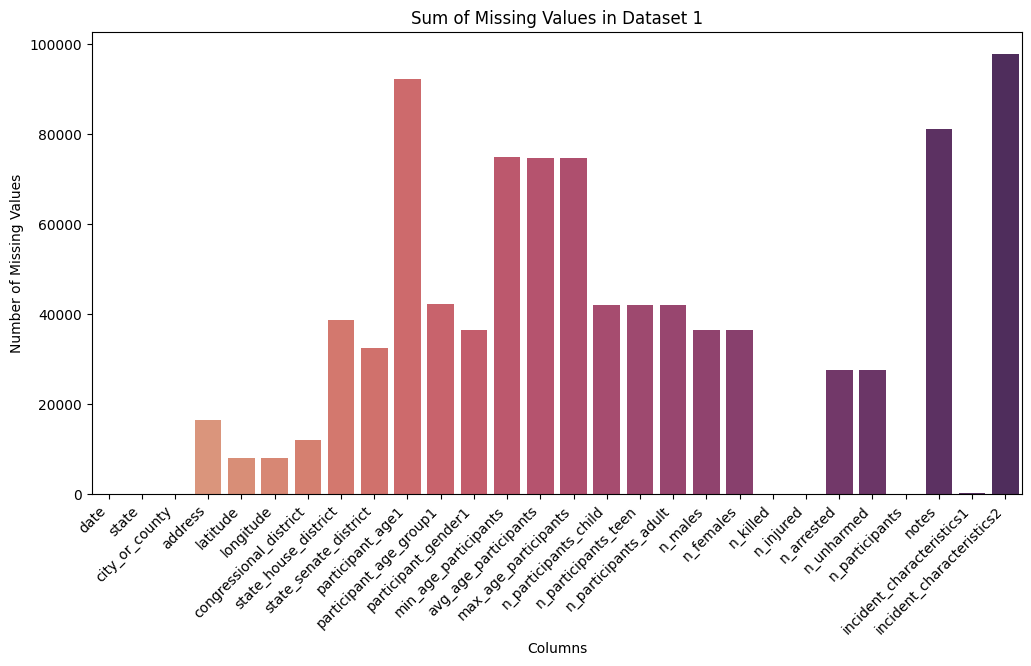

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = dataset1.isnull().sum()
#print("\nMissing Values:\n", missing_values)

# Plotting the sum of missing values for each column using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, palette='flare', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Sum of Missing Values in Dataset 1')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [26]:
# Check for duplicates
d1_duplicates = dataset1.duplicated().sum()
print("\nNumber of Duplicates:", d1_duplicates)


Number of Duplicates: 296


In [27]:
# Check for duplicates
d2_duplicates = dataset2.duplicated().sum()
print("\nNumber of Duplicates:", d2_duplicates)


Number of Duplicates: 0


In [28]:
# Check for duplicates
d3_duplicates = dataset3.duplicated().sum()
print("\nNumber of Duplicates:", d3_duplicates)


Number of Duplicates: 0


### Distribution of variables

x

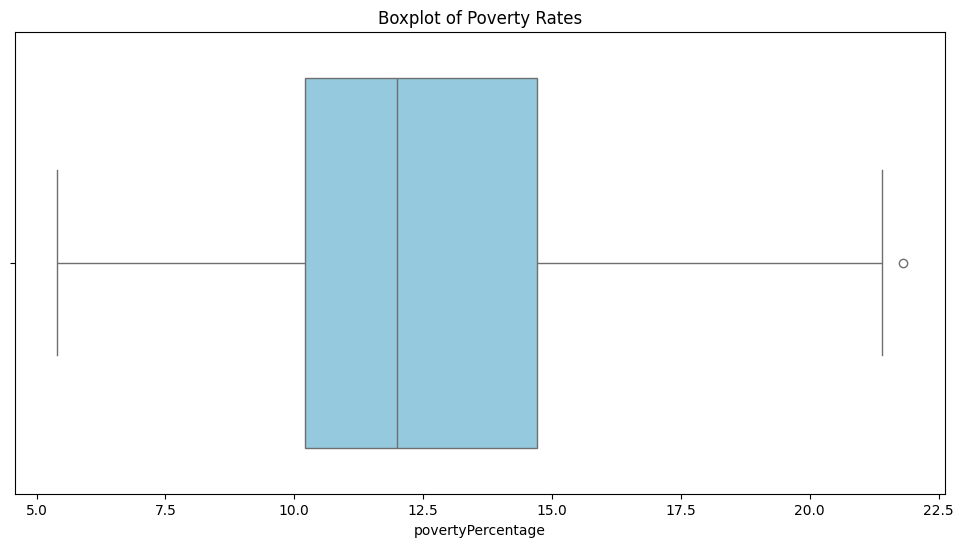

In [35]:
from scipy.stats.mstats import winsorize

# Visualize the distribution of povertyPercentage for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset2, x='povertyPercentage', color='skyblue')
plt.title('Boxplot of Poverty Rates')
plt.show()

# Handle outliers (if any)
dataset2['povertyPercentage'] = winsorize(dataset2['povertyPercentage'], limits=[0.05, 0.05])


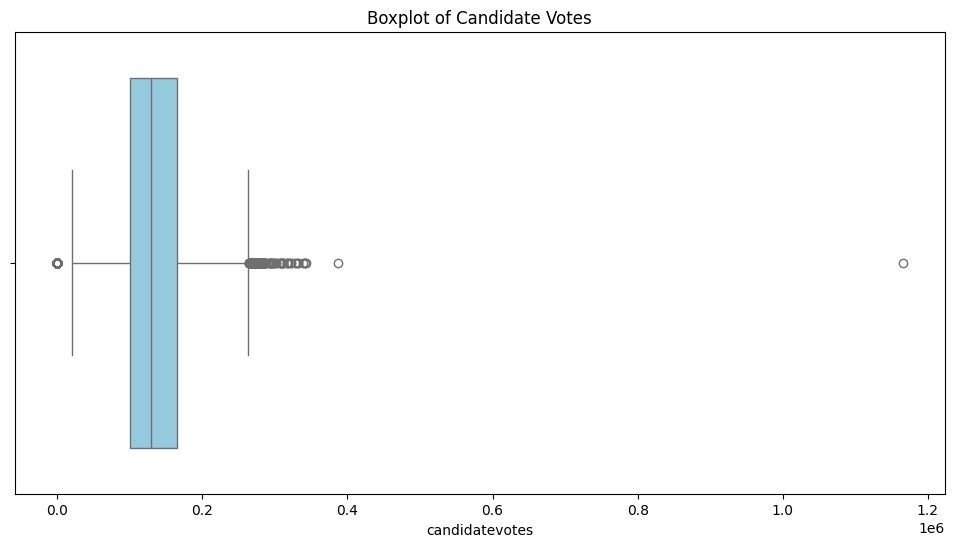

In [36]:
# Visualize the distribution of candidatevotes for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset3, x='candidatevotes', color='skyblue')
plt.title('Boxplot of Candidate Votes')
plt.show()

# Handle outliers (if any)
dataset3['candidatevotes'] = winsorize(dataset3['candidatevotes'], limits=[0.05, 0.05])


#### Evolution of Incidents Over Time

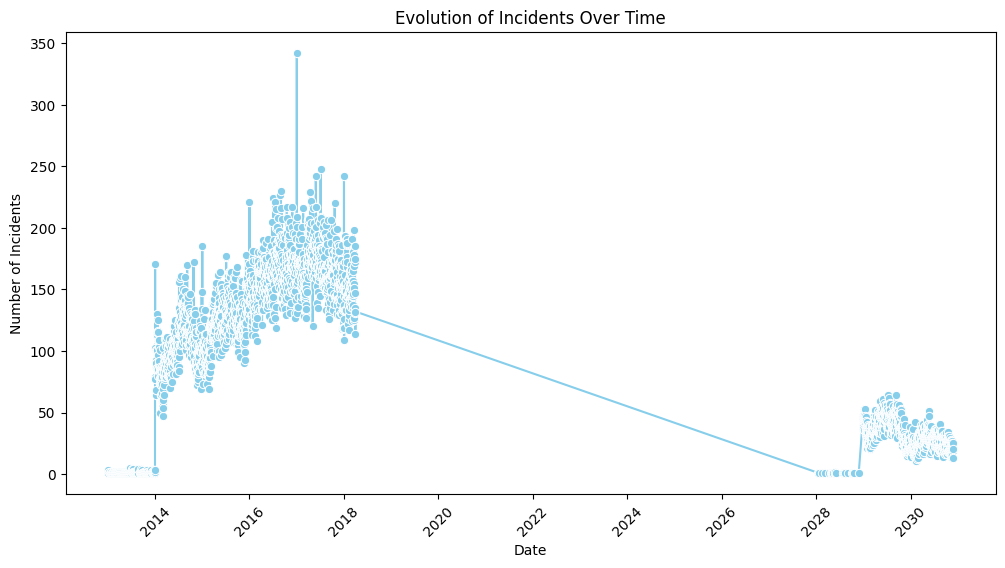

In [37]:
# Convert the 'date' column to datetime
dataset1['date'] = pd.to_datetime(dataset1['date'])

# Count the number of incidents for each date
incident_counts = dataset1['date'].value_counts().sort_index()

# Plotting the evolution of the amount of incidents over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_counts.index, y=incident_counts.values, marker='o', color='skyblue')
plt.title('Evolution of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

#### Geographical Distribution of Incidents

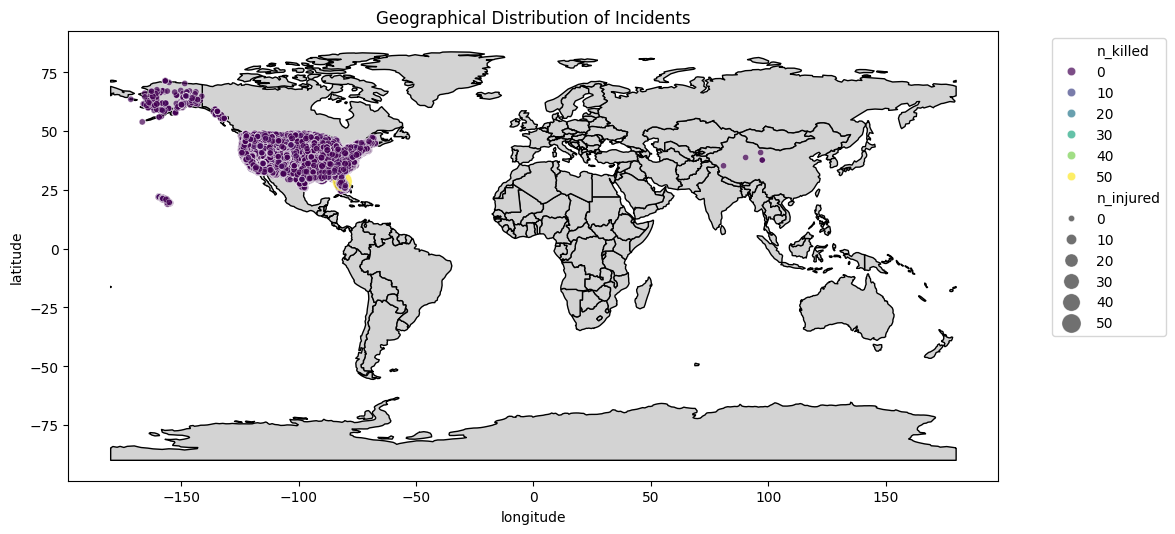

In [44]:
import geopandas as gpd

world_filepath = './110m_cultural/ne_110m_admin_0_countries.shp'
world = gpd.read_file(world_filepath)

# Create a GeoDataFrame from the dataset1 DataFrame
gdf = gpd.GeoDataFrame(dataset1, geometry=gpd.points_from_xy(dataset1.longitude, dataset1.latitude))

# Plot the world map
world.plot(figsize=(12, 8), color='lightgrey', edgecolor='black')

# Plot the scatter plot on top of the world map
scatter_plot = sns.scatterplot(x='longitude', y='latitude', data=dataset1, hue='n_killed', palette='viridis',
                               size='n_injured', sizes=(20, 200), alpha=0.7)

# Move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Geographical Distribution of Incidents')
plt.show()

#### Distribution of Participant Ages and Sex

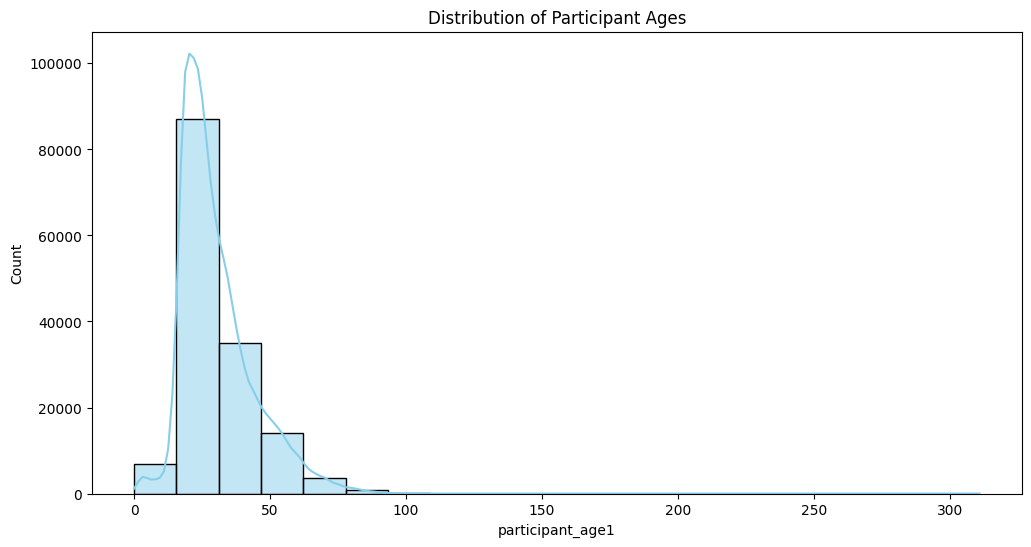

In [45]:
# Participant Characteristics
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset1, x='participant_age1', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Participant Ages')
plt.show()

In [46]:
gender_counts = dataset1['participant_gender1'].value_counts()

# Print the counts
print("Gender Distribution:")
print(gender_counts)

Gender Distribution:
participant_gender1
Male            177945
Female           25369
Male, female         1
Name: count, dtype: int64


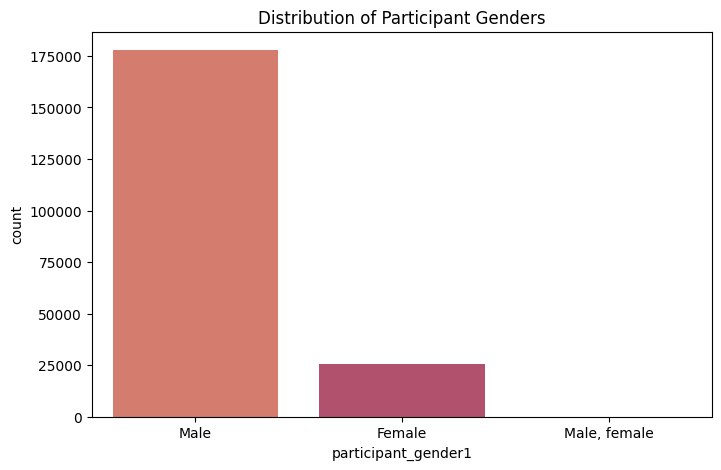

In [48]:
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset1, x='participant_gender1', palette='flare', hue='participant_gender1', legend=False)
plt.title('Distribution of Participant Genders')
plt.show()

#### Number of Participants and Casualties

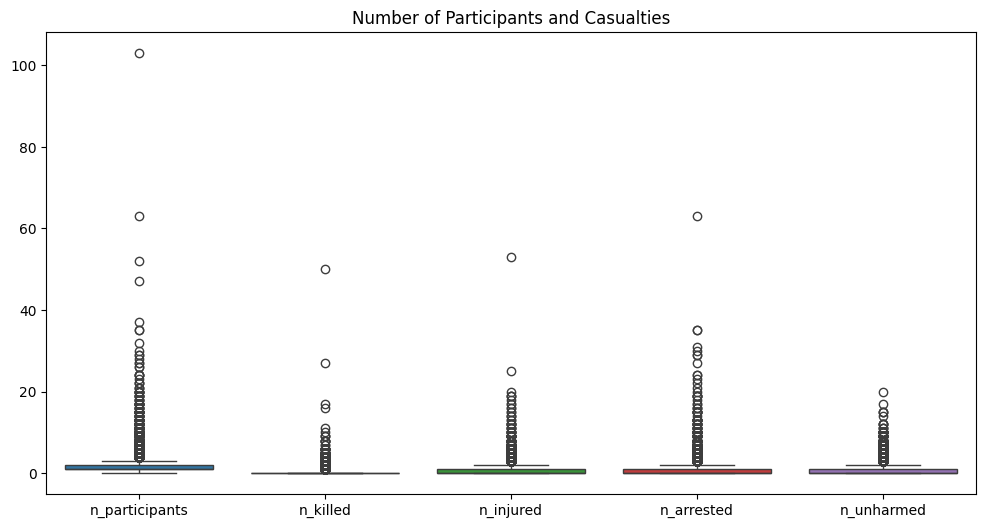

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset1[['n_participants', 'n_killed', 'n_injured','n_arrested', 'n_unharmed']])
plt.title('Number of Participants and Casualties')
plt.show()

#### Incident Characteristics

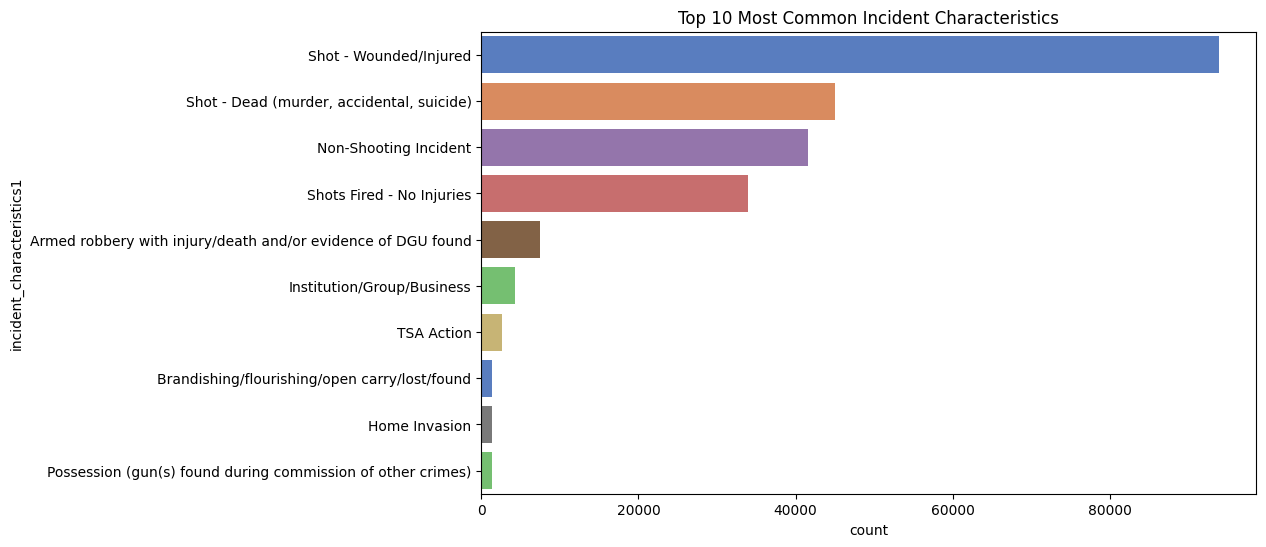

In [51]:
# Get the top 10 most common incident characteristics
top10_characteristics = dataset1['incident_characteristics1'].value_counts().nlargest(10).index

# Create a countplot with the top 10 incident characteristics
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset1, y='incident_characteristics1', order=top10_characteristics, palette='muted', hue='incident_characteristics1', legend=False)
plt.title('Top 10 Most Common Incident Characteristics')
plt.show()


### Pairwise correlation

To perform pairwise correlation analysis, `corr()` function of `pandas` can be used, to compute the correlation matrix and then visualize it using a heatmap.

The goal of pairwise correlation analysis is to understand the linear relationship between pairs of variables. The correlation coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation, and
- 0 indicates no correlation.

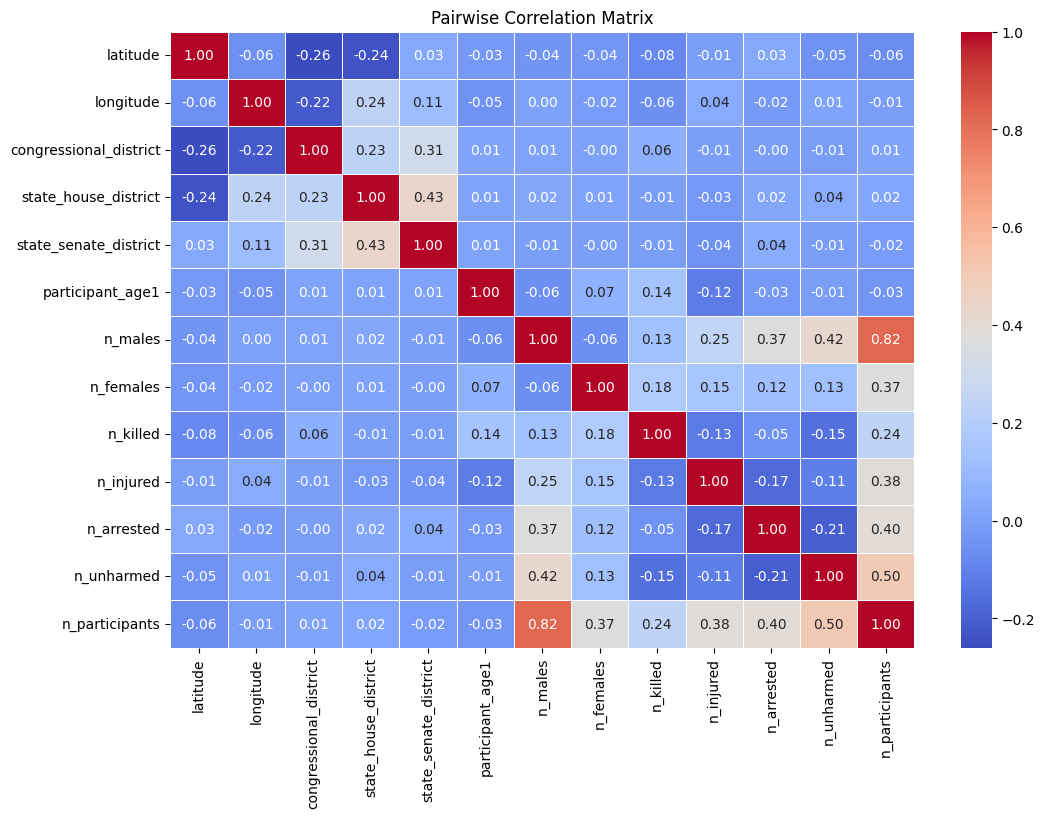

In [52]:
# Select numerical columns for correlation analysis
numerical_columns = dataset1.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pairwise Correlation Matrix')
plt.show()

#### Incidents and Poverty Rates Correlation:

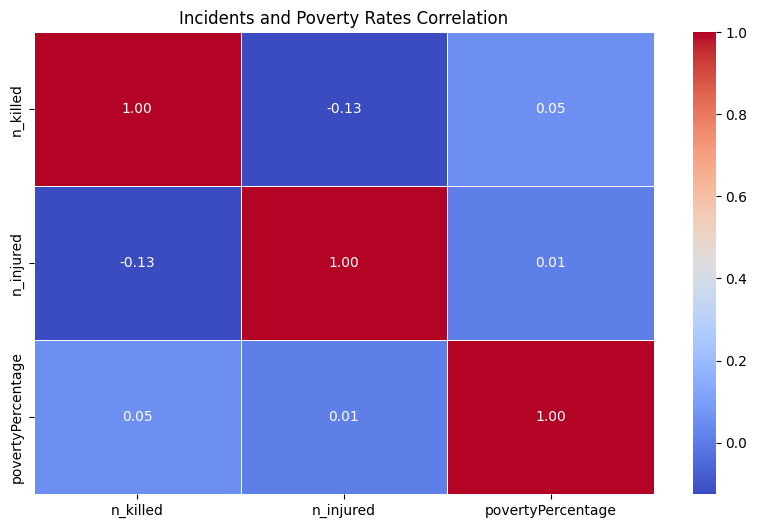

In [53]:
# 'state' is the common column between dataset1 and dataset2
merged_dataset1_2 = pd.merge(dataset1, dataset2, on='state', how='inner')

# Compute the correlation matrix
correlation_matrix_incidents_poverty = merged_dataset1_2[['n_killed', 'n_injured', 'povertyPercentage']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_incidents_poverty, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Incidents and Poverty Rates Correlation')
plt.show()


D:\LANAK\POSGRADO\master_pisa\OneDrive - University of Pisa\data_mining\project\env\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
D:\LANAK\POSGRADO\master_pisa\OneDrive - University of Pisa\data_mining\project\env\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


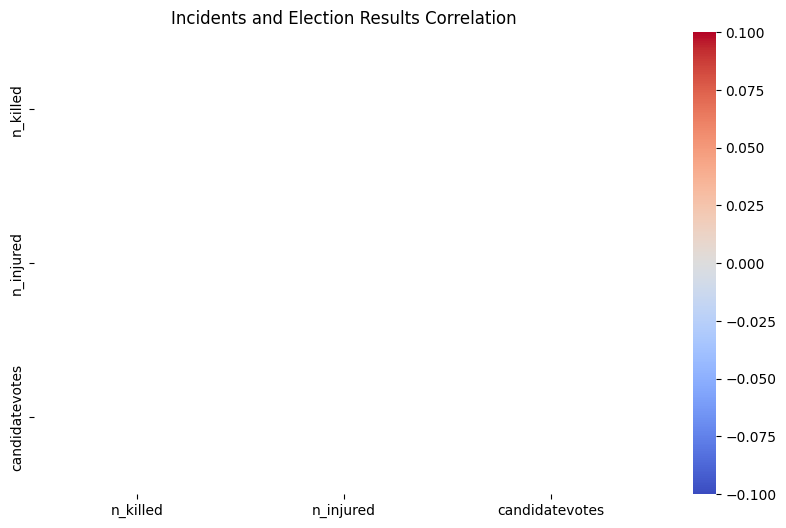

In [61]:
# 'state' is the common column between dataset1 and dataset3
merged_dataset1_3 = pd.merge(dataset1, dataset3, on='state', how='inner')

# Compute the correlation matrix
correlation_matrix_incidents_election = merged_dataset1_3[['n_killed', 'n_injured', 'candidatevotes']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_incidents_election, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Incidents and Election Results Correlation')
plt.show()


## Data Preparation

### Geographical data fixing

As we see in the data understanding section, there were some outliers in the geographical data, since it was visible that there were some incidents around India, when there would be just incidents from the USA.

To fix that we refined the filtering criteria based on the latitude and longitude values. We set the latitude and longitude ranges to cover the area of the United States, including Alaska and Hawaii that have different coordinates that the main US region. These adjusted ranges ensure that incidents falling within the geographical coordinates of the entire United States are retained in the filtered dataset. This refined filtering approach allows for the accurate representation of incident locations on the geographical scatter plot while eliminating data points located outside the intended area of interest.

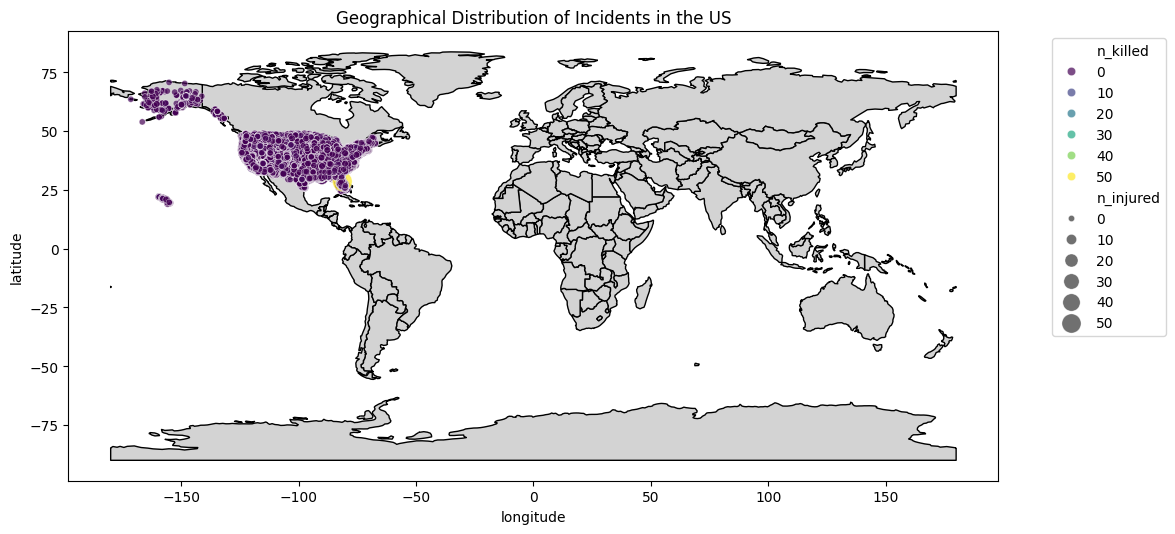

In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the latitude and longitude ranges for the United States
us_latitude_range = (18, 71)
us_longitude_range = (-179, -66)

# Filter out incidents outside the US coordinates
dataset1_us = dataset1[(dataset1['latitude'].between(*us_latitude_range)) &
                        (dataset1['longitude'].between(*us_longitude_range))]

# Create a GeoDataFrame from the filtered dataset
gdf_us = gpd.GeoDataFrame(dataset1_us, geometry=gpd.points_from_xy(dataset1_us.longitude, dataset1_us.latitude))

# Plot the world map
world_filepath = './110m_cultural/ne_110m_admin_0_countries.shp'
world.plot(figsize=(12, 8), color='lightgrey', edgecolor='black')

# Plot the scatter plot on top of the world map for the US incidents
scatter_plot = sns.scatterplot(x='longitude', y='latitude', data=dataset1_us, hue='n_killed', palette='viridis',
                               size='n_injured', sizes=(20, 200), alpha=0.7)

# Move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Geographical Distribution of Incidents in the US')
plt.show()


Remove ages that are higher than 100

In [ ]:
# TBD